In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("D:/DA2210R1/data/FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")

In [3]:
df.shape

(7381, 8)

In [4]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [5]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [7]:
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [8]:
df.notna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7376,True,True,True,True,True,True,True,True
7377,True,True,True,True,True,True,True,True
7378,True,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True,True


###### Xử lý dữ liệu ngoại lai cho đặc trưng Price

<AxesSubplot:xlabel='Price'>

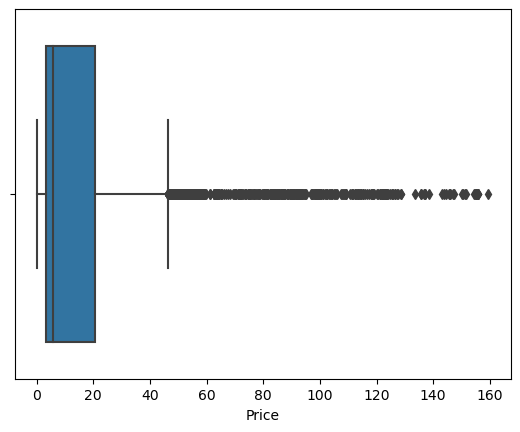

In [12]:
sns.boxplot(x = df["Price"])

##### Chuẩn hóa dữ liệu

In [14]:
# mô tả dữ liệu
df['Price'].describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

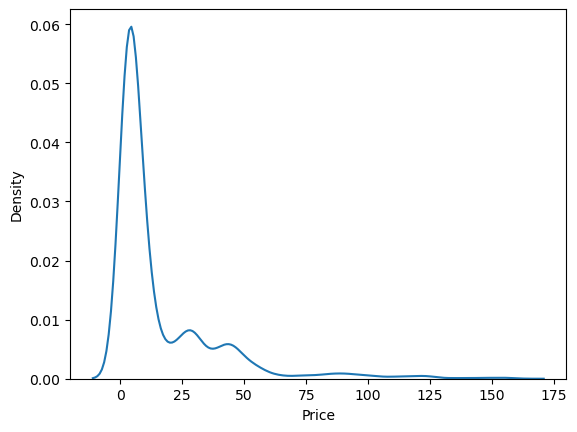

In [16]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df['Price'])

##### Chuẩn hóa dữ liệu với minmax scaling

In [18]:
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df[['Price']])

In [19]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,7381.000000
mean,0.097271
std,0.140826
min,0.000000
25%,0.018655
50%,0.035528
75%,0.126815
max,1.000000


<AxesSubplot:>

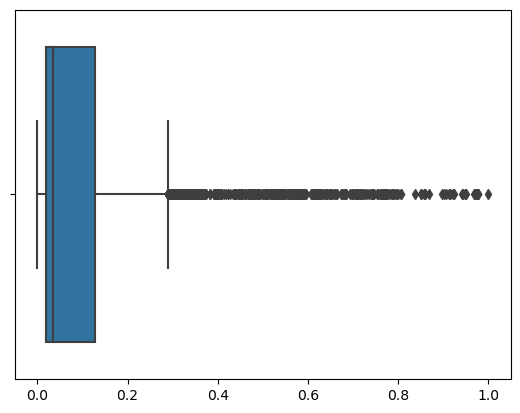

In [20]:
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

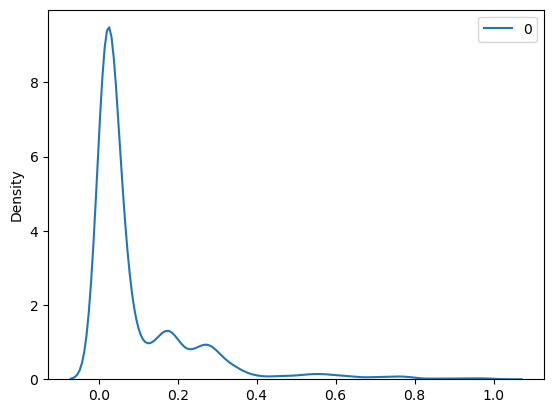

In [21]:
sns.kdeplot(data=df_s)

###### Chuẩn hóa dữ liệu với robust scaling

In [23]:
scaler = RobustScaler()
df_s = scaler.fit_transform(df[['Price']])

In [24]:
pd.DataFrame(df_s).describe()

,0
count,7381.000000
mean,0.570852
std,1.302003
min,-0.328470
25%,-0.155997
50%,0.000000
75%,0.844003
max,8.917036


<AxesSubplot:>

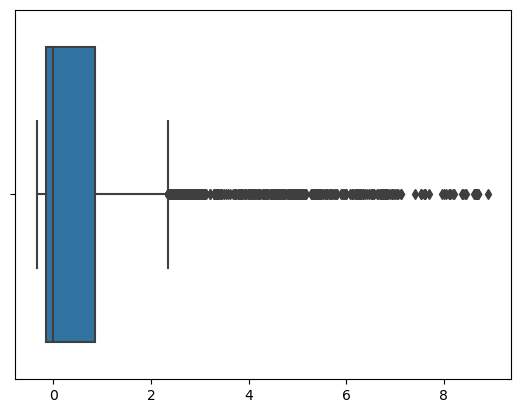

In [25]:
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

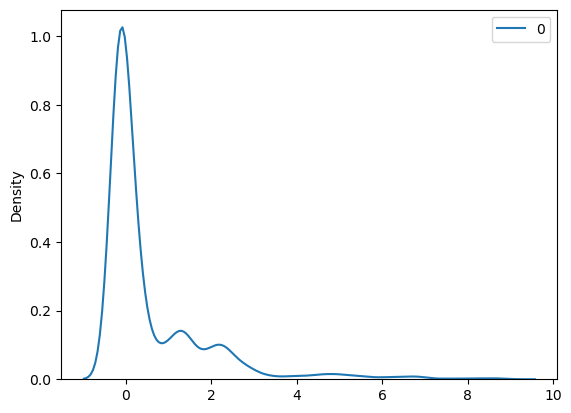

In [26]:
sns.kdeplot(data=df_s)

###### Chuẩn hóa dữ liệu với z-score scaling

In [28]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df[['Price']])

In [29]:
pd.DataFrame(df_s).describe()

,0
count,7.381000e+03
mean,-2.592877e-16
std,1.000068e+00
min,-6.907691e-01
25%,-5.582924e-01
50%,-4.384713e-01
75%,2.098069e-01
max,6.410697e+00


<AxesSubplot:>

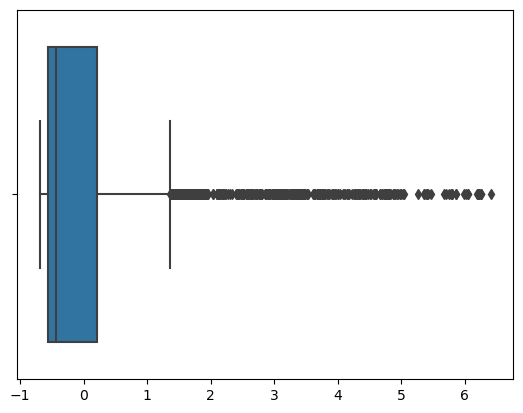

In [30]:
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

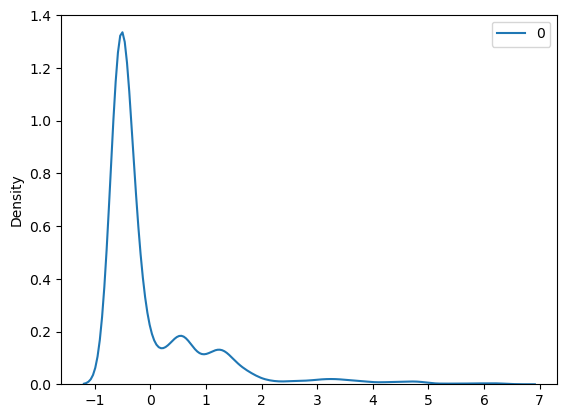

In [31]:
sns.kdeplot(data=df_s)

In [33]:
# các giá trị ở cột ProductName
df['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

##### mã hóa cột ProductName với One-hot encoder sử dụng scikit learn

In [35]:
# mã hóa cột ProductName với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df['ProductName']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

###### mã hóa cột ProductName với One-hot encoder sử dụng pandas

In [37]:
pd.get_dummies(df['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### mã hóa cột ProductName với Label encoder sử dụng scikit learn

In [39]:
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df['ProductName']))
encoded_data

array([37, 37, 37, ..., 11, 11, 11])

###### mã hóa cột ProductName với Label encoder sử dụng pandas

In [41]:
df['ProductName'].astype('category').cat.codes

0       37
1       37
2       37
3       37
4       37
        ..
7376    11
7377    11
7378    11
7379    11
7380    11
Length: 7381, dtype: int8

#### Rời rạc hóa dữ liệu

In [43]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [45]:
cats = pd.cut(df['Price'], 5)
cats

0       (0.0947, 32.092]
1       (0.0947, 32.092]
2       (0.0947, 32.092]
3       (0.0947, 32.092]
4       (0.0947, 32.092]
              ...       
7376    (32.092, 63.931]
7377    (32.092, 63.931]
7378    (32.092, 63.931]
7379    (32.092, 63.931]
7380    (32.092, 63.931]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(0.0947, 32.092] < (32.092, 63.931] < (63.931, 95.769] < (95.769, 127.607] < (127.607, 159.446]]

In [46]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.0947, 32.092]      6223
(32.092, 63.931]       867
(63.931, 95.769]       155
(95.769, 127.607]      105
(127.607, 159.446]      31
Name: Price, dtype: int64

In [47]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df['Price'], 5)
cats

0          (2.837, 4.649]
1          (2.837, 4.649]
2           (4.649, 8.19]
3           (4.649, 8.19]
4           (4.649, 8.19]
              ...        
7376    (27.676, 159.446]
7377    (27.676, 159.446]
7378    (27.676, 159.446]
7379    (27.676, 159.446]
7380    (27.676, 159.446]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(0.253, 2.837] < (2.837, 4.649] < (4.649, 8.19] < (8.19, 27.676] < (27.676, 159.446]]

In [48]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.253, 2.837]       1477
(2.837, 4.649]       1476
(4.649, 8.19]        1476
(8.19, 27.676]       1476
(27.676, 159.446]    1476
Name: Price, dtype: int64